100%|██████████████████████████████████████████████████████████████████████████████| 128/128 [00:00<00:00, 3889.27it/s]



Training images: 128


100%|████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 3997.55it/s]


Testing images:  32
x_train shape: (4, 28, 28, 1)
Number of images in x_train 4
Number of images in x_test 32
[0.01568628]
2
Epoch 1/1
32/32 [==============================] - 0s 4ms/step
Test accuracy: 43.7500%
1
Saved model to disk


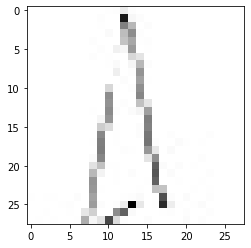

In [5]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

train_data = 'spells/train/1'
test_data = 'spells/test/1'

def image_label(img):
    label = img.split('.')[0]
    global ohl
    if label == "AM":
        ohl = 0
    elif label == "Incendio":
        ohl = 1
    elif label == "Revelio":
        ohl = 2
    elif label == "WLeviosa":
        ohl = 3
    return ohl

def add_label_to_train_data():
    train_images = []
    for i in tqdm(os.listdir(train_data)):
        path = os.path.join(train_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        train_images.append([np.array(img), image_label(i)])
    shuffle(train_images)
    print("\nTraining images:", len(train_images))
    return train_images

def add_label_to_test_data():
    test_images = []
    for i in tqdm(os.listdir(test_data)):
        path = os.path.join(test_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        test_images.append([np.array(img), image_label(i)])
    print("Testing images: ", len(test_images))
    return test_images

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

training_images = add_label_to_train_data()
testing_images = add_label_to_test_data()
x_train = np.array([i[0] for i in training_images]).reshape(-1,28,28,1)
y_train = np.array([i[1] for i in training_images])
x_test = np.array([i[0] for i in testing_images]).reshape(-1,28,28,1)
y_test = np.array([i[1] for i in testing_images])

b = 4
x_train_2 = x_train[0:b,:,:]
y_train_2 = y_train[0:b]
x_train_2.shape
y_train_2.shape
x_train = x_train_2
y_train = y_train_2

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)

print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


a =2
x_test_temp = x_train[a,:,:,0]
x_test_temp.shape
#print(y_train[image_index])
plt.imshow(x_test_temp, cmap='Greys')
print (x_train[a,10,10,:])
print(y_train[a])


input_shape = (28, 28, 1)

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(4,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x=x_train,y=y_train, epochs=1)

model.evaluate(x_test, y_test)

score = model.evaluate(x_test, y_test, verbose = 0)
accuracy = 100*score[1]
print("Test accuracy: %.4f%%" % accuracy)

image_index = 8
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

model_json = model.to_json()
with open("model_for_spells.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_for_spells.h5")
print("Saved model to disk")

In [6]:
from keras.models import model_from_json
# load json and create model
json_file = open('model_alldata.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_alldata.h5")
print("Loaded model from disk")
 
print(x_train.shape, y_train.shape)

Loaded model from disk
(4, 28, 28, 1) (4,)


In [7]:
loaded_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
loaded_model.fit(x=x_train,y=y_train, epochs=1)


Epoch 1/1
4/4 [==============================] - 1s 152ms/step - loss: 2.0911 - acc: 0.2500


In [8]:
loaded_model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 4ms/step


[2.240429401397705, 0.28125]